# Bloc Final Project
Michael Hoelzer and Josh Salmon

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Overview:

We are utilizing data from an app called Bloc, which is a communication and engagement tool at a few high schools in St. Louis. The data was taken from the first semester of school (115 days). For this project, we wanted to see how our research and models can help Bloc during implementation processes at other schools, feature engineering for boosted engagement, and uncover trends to help schools and their communities in the future. To complete the project, we are using 4 different datapoints/features in the app:
- Users
- Events
- Media
- Directory

## Final Results:

Our end goal was to create a model that can predict how Bloc might be used/utilized at another school if Bloc were to be implemented. We chose Villa Duchesne because it allowed us to observed patterns from schools with similar characteristics to Villa, providing a basis for making informed predictions. To do this, we created our dummy (fake) data for Villa Duchesne and then created our models for each feature. Doing so allows us to:

- Understanding Potential User Engagement: If Villa doesn't have existing usage data (because Bloc is not yet implemented), creating a simulated dataset based on known patterns from similar schools can help predict how their users might engage with the directory.


- Model Training: Predictive models need data to learn from. If Villa has no historical data, the model can't be trained to predict for Villa specifically. By using dummy data that reflects the behavior at similar institutions, you create a proxy that allows the model to learn patterns that might be applicable to Villa.


- Feature Representation: The dummy data for Villa should have similar feature values to those from the other schools to ensure the model learns a representation that is relevant when making predictions for Villa. It might include similar directory titles, types of content, or any other relevant features.


- Better Generalization: Training on a more extensive dataset that includes both real and dummy data can help the model generalize better, especially when the real data is limited. This can potentially improve the model's accuracy when predicting unknown data.


- Performance Estimation: The Root Mean Squared Error (RMSE) calculated can give an estimate of how well the model might perform when predicting clicks for Villa. This estimate is more reliable when the dummy data closely matches what Villa's actual data might look like.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Libraries and Dependencies

In [28]:
# Importing all the Packages and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns
from tabulate import tabulate
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore


warnings.filterwarnings("ignore")

In [29]:
# Read Excel files into DataFrames
df1 = pd.read_excel('Users.xlsx')
df2 = pd.read_excel('Events.xlsx')
df3 = pd.read_excel('Media.xlsx')
df4 = pd.read_excel('Directory.xlsx')

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Analyzing the Users

In [30]:
selected_features_df1 = df1[['User_ID', 'Identification', 'School', 'Event_Clicks', 'Media_Clicks', 'Directory_Clicks', 'Days_Logged_In']]
selected_features_df1.head()

,User_ID,Identification,School,Event_Clicks,Media_Clicks,Directory_Clicks,Days_Logged_In
0,User 34,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",1,0,1.0,2
1,User 27,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",1,1,0.0,3
2,User 43,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",1,0,1.0,4
3,User 42,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",0,1,1.0,5
4,User 6,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",2,0,1.0,7


This DataFrame includes crucial user-centric information such as User_ID, Identification, School affiliation, counts of clicks on Events, Media, and Directory listings, as well as the number of Days Logged In. By focusing on these features, the analysis aims to gain a holistic understanding of user behavior patterns, preferences, and engagement levels within the app over the first semester of school. Through this comprehensive approach, insights can be derived regarding the popularity of various app features, differences in engagement across different schools, and overall user activity trends. These insights are invaluable for informing strategies to enhance user engagement, optimize app functionality, and tailor the Bloc app experience to better meet the needs of its users and the educational communities it serves.

## Data Pre-processing

In [4]:
def check_missing_values(data):
    missing_values = data.isna().sum().sum()
    if missing_values == 0:
        print("No missing values found.")
    else:
        print("Number of missing values found:", missing_values)

check_missing_values(selected_features_df1)

No missing values found.


Checking for missing values is a fundamental step in data analysis that serves multiple purposes. It ensures the integrity and accuracy of the dataset by identifying any gaps or inconsistencies in the data. Addressing missing values is essential to prevent bias and ensure the validity of analysis results. Additionally, many statistical techniques and machine learning algorithms require complete datasets, making it necessary to handle missing values appropriately before applying these methods. By identifying missing values early in the analysis process, data scientists can employ various imputation techniques or data preprocessing strategies to fill in missing values or mitigate their impact on subsequent analyses. Ultimately, thorough consideration of missing values contributes to more robust and reliable data analysis outcomes.

In [21]:
summary_statistics = selected_features_df1.describe()
summary_statistics

,Event_Clicks,Media_Clicks,Directory_Clicks,Days_Logged_In
count,1916.000000,1916.000000,403.000000,1916.000000
mean,12.124739,18.578288,4.213400,55.069937
std,11.099577,14.629047,3.701434,31.608065
min,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.750000,1.000000,28.000000
50%,9.500000,15.000000,3.000000,55.000000
75%,20.000000,28.000000,6.000000,83.000000
max,45.000000,60.000000,15.000000,113.000000


Analyzing summary statistics can help identify outliers, understand the spread of the data, and gain initial insights into its characteristics. These summary statistics serve as a foundation for further exploratory data analysis and modeling tasks, guiding researchers in understanding the dataset's structure and informing subsequent analytical decisions.

The summary statistics reveal the distribution and central tendency of numerical features in the dataset. The mean number of clicks for 'Event_Clicks' is 16.20, with a standard deviation of 11.53, indicating a wide dispersion of data, with a range of 0 to 45. The mean number of clicks for 'Media_Clicks' is 6.10, with a standard deviation of 7.25, indicating lower average engagement with media compared to events. The mean number of clicks for 'Directory_Clicks' is 7.04, suggesting moderate engagement with the directory feature. The mean number of logged-in days is 55.07, with a standard deviation of 31.61, indicating frequent logging in but some variability in usage duration. These statistics offer a comprehensive understanding of usage patterns within the Bloc app, highlighting varying levels of engagement across different features and the distribution of user activity over time.

For instance, when comparing the click counts of different features, such as events and directory listings, understanding their respective standard deviations enables us to contextualize the significance of the differences observed. For example, if one event receives 12 more clicks than another event, and this variance is 1 standard deviation, it suggests a moderate difference. Conversely, if the directory receives 12 more clicks, and this variance represents 2 standard deviations, it indicates a more substantial difference in engagement levels. By leveraging summary statistics, we can effectively interpret and compare the significance of changes across different features within the dataset.

In [6]:
# Total number of users per school
users_per_school = selected_features_df1.groupby('School')['User_ID'].nunique().reset_index()
users_per_school.columns = ['School', 'Total_Users']

# Sum and average clicks for each feature per school
clicks_per_feature_sum = selected_features_df1.groupby('School')[['Event_Clicks', 'Media_Clicks', 'Directory_Clicks']].sum().reset_index()
clicks_per_feature_mean = selected_features_df1.groupby('School')[['Event_Clicks', 'Media_Clicks', 'Directory_Clicks']].mean().reset_index()

# Total and average days logged in per school
days_logged_in_sum = selected_features_df1.groupby('School')['Days_Logged_In'].sum().reset_index()
days_logged_in_mean = selected_features_df1.groupby('School')['Days_Logged_In'].mean().reset_index()

# Merge results into a single DataFrame
result_df = pd.merge(users_per_school, clicks_per_feature_sum, on='School')
result_df = pd.merge(result_df, clicks_per_feature_mean, on='School')
result_df = pd.merge(result_df, days_logged_in_sum, on='School')
result_df = pd.merge(result_df, days_logged_in_mean, on='School')

result_df.columns = ['School', 'Total_Users', 'Event_Clicks_Sum', 'Media_Clicks_Sum', 'Directory_Clicks_Sum', 'Event_Clicks_Mean', 'Media_Clicks_Mean', 'Directory_Clicks_Mean', 'Days_Logged_In_Sum', 'Days_Logged_In_Mean']

result_df

,School,Total_Users,Event_Clicks_Sum,Media_Clicks_Sum,Directory_Clicks_Sum,Event_Clicks_Mean,Media_Clicks_Mean,Directory_Clicks_Mean,Days_Logged_In_Sum,Days_Logged_In_Mean
0,"Incarnate Word Academy - St. Louis, MO",403,4662,5392,1698,11.568238,13.379653,4.213400,19484,48.347395
1,"Nerinx Hall - St. Louis, MO",824,14599,3309,6334,17.717233,4.015777,7.686893,47582,57.745146
2,"St. Joseph's Academy - St. Louis, MO",689,11787,2995,5465,17.107402,4.346880,7.931785,38448,55.802612


The gathered information offers an examination of user involvement among three of the most notable schools in St. Louis, Missouri: Incarnate Word Institute, Nerinx Anteroom, and St. Joseph's Establishment. With 403 users, Incarnate Word Establishment shows an unobtrusive level of activity. Every person has around 11.57 event clicks, 13.38 media hits, and 4.21 directory clicks. These aggregates amount to 19,484 logged-in days, with an average of 48.35 days per user. Then again, Nerinx Entryway has 824 users, indicating a more prominent level of active involvement. Every user has an average of 17.72 event clicks, 4.02 media hits, and 7.69 directory clicks, adding up to 47,582 logged-in days with an average of 57.75 days per user. Moreover, with 689 users, St. Joseph's Establishment offers critical user support. This is like Nerinx Entryway concerning engagement, with every user averaging 17.11 event clicks, 4.35 media clicks, and 7.93 directory clicks. These clicks amount to 38,448 logged-in days, or 55.80 days per user. These synopses feature unobtrusive contrasts in how users behave and interact with the instructive institutions, which relate to various levels of local area involvement and utilization of the Bloc application.

By displaying the total number of users per school, it provides insights into the size of each school's user base. Additionally, the total and average clicks for different app features, such as events, media, and directory listings, offer a nuanced understanding of user interaction preferences within each school community. Furthermore, the metrics on total and average days logged in per school shed light on the frequency and consistency of app usage among users.

By displaying this information in a consolidated format we are able to do a comparative analysis between schools, revealing trends, patterns, and disparities in app engagement and utilization. For instance we can see that Nerinx Hall, and St. Joseph's average event, media, and directory clicks are roughly the same event with a 135 student difference. We can hypothesis from this that these schools host realtivly the same events that bring tracksion. We can also hypothesis that IWA does not host the event/events that these schools host. We will be checking these hypothesis later in the notebook when we look into the most popular events at each school. 

## Exploratory Data Analysis 

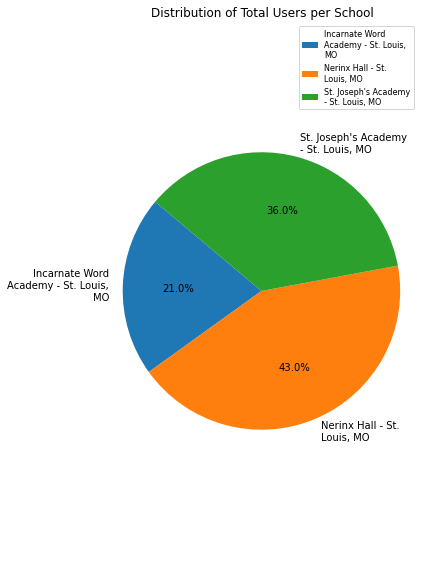

In [7]:
wrapped_labels = ['\n'.join(wrap(label, 20)) for label in result_df['School']]

# Create a pie chart for total users per school with wrapped labels
plt.figure(figsize=(6, 8))
plt.pie(result_df['Total_Users'], labels=wrapped_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Users per School')
plt.legend(wrapped_labels, loc='upper right', fontsize=8)  # Legend with wrapped labels
plt.axis('equal')
plt.tight_layout()
plt.show()

We started by exploring the data. First we wanted to see the total distribution of users per school. IWA was 21%, St. Josephs is 36%, and Nerinx hall is 43%. It is important to know the distribution of users between the three schools because we wanted to choose schools that are in the small, medium and large stage. It can also help us later to know which schools get the most engangement per how big of a school they are. If both IWA and Nerinx hall have the same number of media clicks, we will know that the media is more popular at IWA.

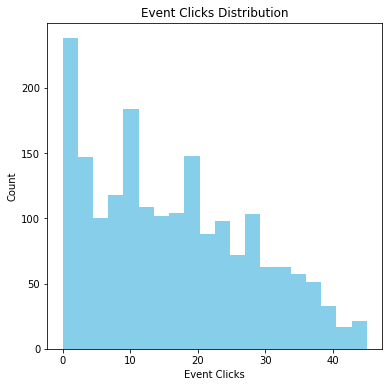

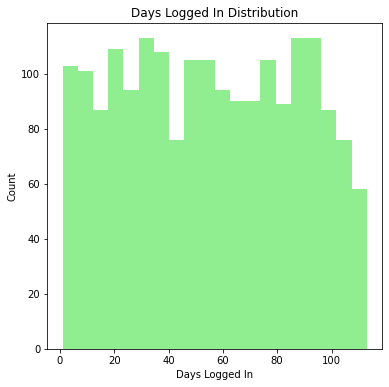

In [8]:
# Engagement Analysis:
event_clicks_distribution = selected_features_df1['Event_Clicks'].value_counts()
days_logged_in_distribution = selected_features_df1['Days_Logged_In'].value_counts()

# Visualize event clicks distribution
plt.figure(figsize=(6, 6))
plt.hist(selected_features_df1['Event_Clicks'], bins=20, color='skyblue')
plt.xlabel('Event Clicks')
plt.ylabel('Count')
plt.title('Event Clicks Distribution')
plt.show()

# Visualize days logged in distribution
plt.figure(figsize=(6, 6))
plt.hist(selected_features_df1['Days_Logged_In'], bins=20, color='lightgreen')
plt.xlabel('Days Logged In')
plt.ylabel('Count')
plt.title('Days Logged In Distribution')
plt.show()

The Even clicks Distribution graph shows us that most events will get 0-10 clicks. The graph starts high and slowly tapers off towards the end. This tells us there are very few events that get 40 or more clicks. This information is useful to us because we now know their are not many events that are super popular. We can look at those events and look for corelations between the most popular events, so that we can continue to do those events. We can also see that there are many events that get 0-5 clicks. We can look through these events to see which events we want to continue doing and which events are not worth doing because of the low engagement.

We compare this with the Days logged in Distribution to visual see if the reason that some events are more popular than other is because they happen to be logged in at the time. The Graph show us that users are logged in until the last 20 days of the semester. With lots of people looking to go to events from days 30-40, and 85-95. This gives us good knowledge as we can look to schedule events during that time for the most engagement.

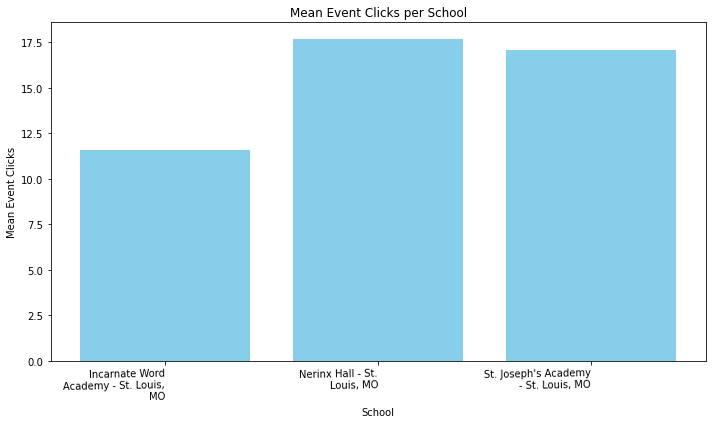

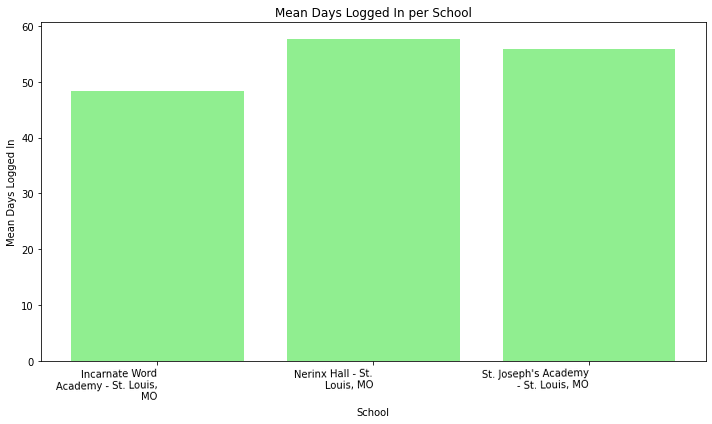

In [9]:
# School-Specific Analysis:
school_event_clicks_mean = selected_features_df1.groupby('School')['Event_Clicks'].mean()
school_days_logged_in_mean = selected_features_df1.groupby('School')['Days_Logged_In'].mean()

# Visualize school-specific analysis with wrapped labels
plt.figure(figsize=(10, 6))
plt.bar(school_event_clicks_mean.index, school_event_clicks_mean.values, color='skyblue')
plt.xlabel('School')
plt.ylabel('Mean Event Clicks')
plt.title('Mean Event Clicks per School')
wrapped_labels = ['\n'.join(wrap(label, 20)) for label in school_event_clicks_mean.index]
plt.xticks(range(len(school_event_clicks_mean.index)), wrapped_labels, rotation=1, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(school_days_logged_in_mean.index, school_days_logged_in_mean.values, color='lightgreen')
plt.xlabel('School')
plt.ylabel('Mean Days Logged In')
plt.title('Mean Days Logged In per School')
wrapped_labels = ['\n'.join(wrap(label, 20)) for label in school_days_logged_in_mean.index]
plt.xticks(range(len(school_days_logged_in_mean.index)), wrapped_labels, rotation=1, ha='right')
plt.tight_layout()
plt.show()

We then looked at the Event clicks per School and the Days loged in per school to see the correlation between the specific school, how many days people are logged in, and how many event clicks the schools gets per day. This visually shows us that there is a linear correlations with the average days logged it and the average amount of clicks each event gets. This tells us that inorder to get more engagement/clicks we need to increase the average amount of days logged in.

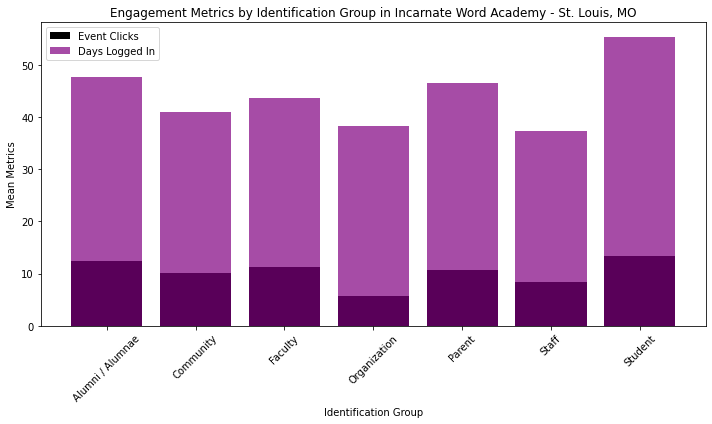

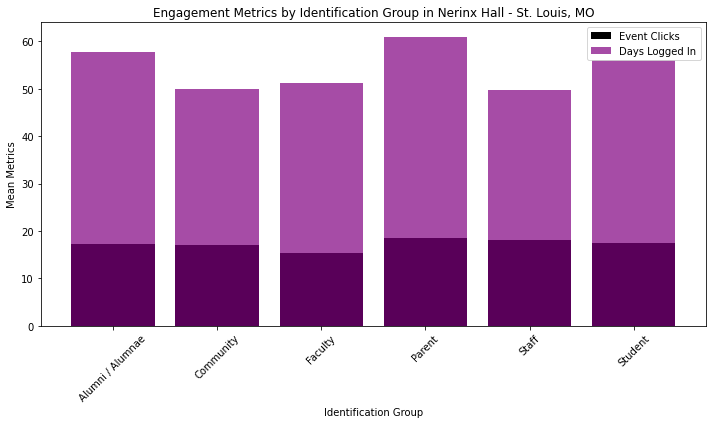

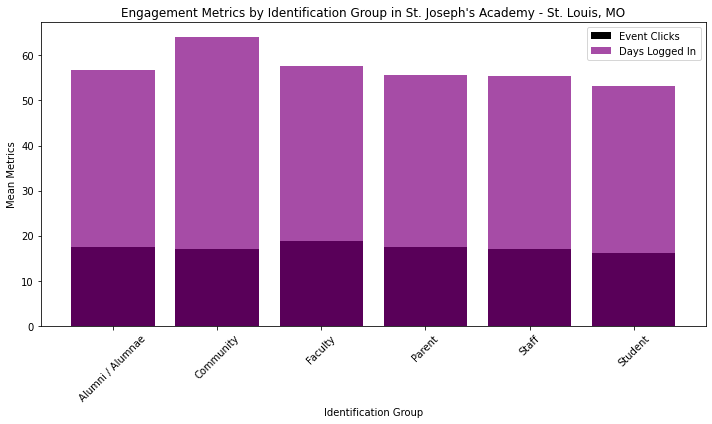

In [10]:
# Engagement Analysis:
engagement_by_identity_group = selected_features_df1.groupby(['School', 'Identification']).agg({
    'Event_Clicks': 'mean',
    'Days_Logged_In': 'mean'
}).reset_index()

# Define colors for each metric
event_clicks_color = 'black'
days_logged_in_color = 'purple'

# Visualize the engagement metrics by identity group within each school
for school in engagement_by_identity_group['School'].unique():
    school_data = engagement_by_identity_group[engagement_by_identity_group['School'] == school]
    plt.figure(figsize=(10, 6))
    plt.bar(school_data['Identification'], school_data['Event_Clicks'], color=event_clicks_color, label='Event Clicks')
    plt.bar(school_data['Identification'], school_data['Days_Logged_In'], color=days_logged_in_color, alpha=0.7, label='Days Logged In')
    plt.xlabel('Identification Group')
    plt.ylabel('Mean Metrics')
    plt.title(f'Engagement Metrics by Identification Group in {school}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

We then wanted to see the correlation between Event clicks and Days logged in per school per each identification group. We wanted to see this distribution because then we can see which group of users is engaged the most. This will help us know if our posts are more catterd towards one identification group or if we are completely missing our target group. These graph show us that at all three schools the amount of event clicks per identification group is roughly the same. Where there is some deviation is total days logged in but they also are all relativly the same. 

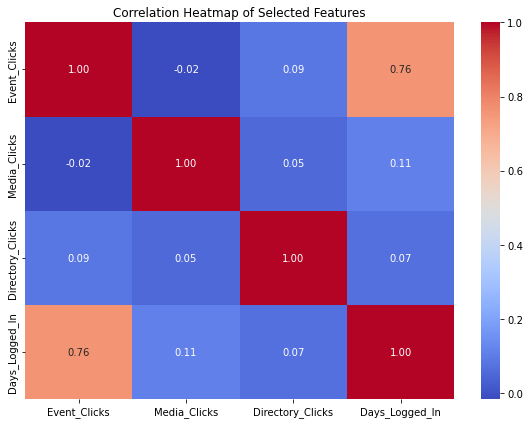

In [11]:
# Select numeric columns
numeric_columns = selected_features_df1.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
correlation_matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

We then created a correlation heat map of our selected features. This will show us if the data points to any features being correlated together. The two features with a high correlation is the Event clicks and the Days logged in. This suggests that the users who interact with event more often will also tend to spend more time logged in. This tells us that the best way to increase event clicks is to get user on the app more.

In [12]:
correlation_matrix

,Event_Clicks,Media_Clicks,Directory_Clicks,Days_Logged_In
Event_Clicks,1.000000,-0.016103,0.086211,0.759787
Media_Clicks,-0.016103,1.000000,0.053638,0.108185
Directory_Clicks,0.086211,0.053638,1.000000,0.071162
Days_Logged_In,0.759787,0.108185,0.071162,1.000000


The connections between the different engagement measurements in the dataset are shown by the association heatmap. Surprisingly, there exists a positive connection (0.76) between "Event Clicks" and "Days Logged In," suggesting that individuals who interact with events more often will also tend to spend more time logged in. On the other hand, there is an impression of being less consistency in the link between "Media Clicks" and the various measurements, indicating a weaker relationship. Moreover, "Directory Clicks" have little relationship with other measurements, suggesting that users' interactions with directory-related items might be inconsequential to their interactions with media or events. As a rule, the heatmap assists with analyzing user activity within the platform by offering insights into the interactions between various engagement measurements.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Events

In [13]:
# Selecting important features
selected_features_df2 = df2[['Name', 'School', 'Location', 'Clicks', 'Created By']]
selected_features_df2.head()

,Name,School,Location,Clicks,Created By
0,Faculty & Staff Retreat,"Incarnate Word Academy - St. Louis, MO",Pallottine Renewal Center,4,Incarnate Word Academy
1,Freshman Volleyball vs. Laffayette High School,"Incarnate Word Academy - St. Louis, MO",Incarnate Word Academy Gym,7,IWA Athletics
2,Freshman Volleyball vs. Pattonville,"Incarnate Word Academy - St. Louis, MO",Incarnate Word Academy Gym,3,IWA Athletics
3,IWA Feast Day Holy Week Mass - Liturgy Schedule,"Incarnate Word Academy - St. Louis, MO",2788 Normandy Drive 63121,14,Incarnate Word Academy
4,No School - Faculty and Staff Retreat,"Incarnate Word Academy - St. Louis, MO",2788 Normandy Drive 63121,18,Incarnate Word Academy


These chosen features serve as key indicators of user interest and interaction levels, offering valuable quantitative metrics through attributes like click counts. Additionally, features like school and location aids in understanding regional or institution-specific preferences. Moreover, the inclusion of the 'Created By' feature enables insights into event ownership. 

In [14]:
# Calculate and print total events per school
total_events_per_school = selected_features_df2['School'].value_counts().reset_index()
total_events_per_school.columns = ['School', 'Total Events']

# Calculate and print average clicks per event per school
average_clicks_per_event = selected_features_df2.groupby('School')['Clicks'].mean().reset_index()
average_clicks_per_event.columns = ['School', 'Average Clicks per Event']

# Calculate and print most popular events per school
most_popular_events_per_school = selected_features_df2.loc[selected_features_df2.groupby('School')['Clicks'].idxmax()]

# Print tables
print("Total events per school:")
print(tabulate(total_events_per_school, headers='keys', tablefmt='grid'))

print("\nAverage clicks per event per school:")
print(tabulate(average_clicks_per_event, headers='keys', tablefmt='grid'))

print("\nMost popular events per school:")
print(tabulate(most_popular_events_per_school, headers='keys', tablefmt='grid'))

Total events per school:
+----+----------------------------------------+----------------+
|    | School                                 |   Total Events |
+====+========================================+================+
|  0 | Nerinx Hall - St. Louis, MO            |            477 |
+----+----------------------------------------+----------------+
|  1 | St. Joseph's Academy - St. Louis, MO   |            456 |
+----+----------------------------------------+----------------+
|  2 | Incarnate Word Academy - St. Louis, MO |            293 |
+----+----------------------------------------+----------------+

Average clicks per event per school:
+----+----------------------------------------+----------------------------+
|    | School                                 |   Average Clicks per Event |
+====+========================================+============================+
|  0 | Incarnate Word Academy - St. Louis, MO |                    15.9113 |
+----+--------------------------------------

First, we calculate the total number of events organized by each school, providing insights into the distribution of events across the different schools. Next, it computes the average number of clicks per event for each school, offering a measure of engagement and interest levels across different events. Additionally, the code identifies the most popular event within each school based on the highest number of clicks, highlighting noteworthy activities that garner significant attention from users. By organizing this information into clear and concise tables, the code enables us to gain a comprehensive understanding of event dynamics, engagement patterns, and preferences within various school settings. The amount of clicks on each of the events tells us that IWA does not do a really popular event like the other two schools. We can then use this information to suggest to another school looking to use bloc that the fall musical, and the fall social are popular events at two other schools with similar dynamics to prompt them to do these events and to heavily advertise these events because are popular. 

In [15]:
# Categorize events based on 'Created By'
def categorize_event(created_by):
    if created_by.endswith('Athletics'):
        return 'Sports'
    else:
        return 'Organizational'

# Apply the adjusted categorization to the data
selected_features_df2['Category'] = selected_features_df2['Created By'].apply(categorize_event)

# Calculate total and average clicks by category for each school
clicks_by_category_school = selected_features_df2.groupby(['School', 'Category'])['Clicks'].agg(['sum', 'mean', 'count']).reset_index()
clicks_by_category_school

,School,Category,sum,mean,count
0,"Incarnate Word Academy - St. Louis, MO",Organizational,2414,17.120567,141
1,"Incarnate Word Academy - St. Louis, MO",Sports,2248,14.789474,152
2,"Nerinx Hall - St. Louis, MO",Organizational,11540,40.633803,284
3,"Nerinx Hall - St. Louis, MO",Sports,3459,17.922280,193
4,"St. Joseph's Academy - St. Louis, MO",Organizational,8003,29.973783,267
5,"St. Joseph's Academy - St. Louis, MO",Sports,3784,20.021164,189


Within every institution, the table offers a breakdown of the event classes and the information that accompany them. The two essential event classes, "Organizational" and "Sports," are recognized for all institutions. Both St. Joseph's Institute and Incarnate Word Foundation show a comparative example, sponsoring around a similar measure of extracurricular and athletic activities. Nerinx Corridor, on the other hand, displays a striking inconsistency, with a particularly greater amount of organizational events relative to sporting events. This acknowledgment highlights the need for customized event planning methods to address the distinct interests and objectives of each school by pointing to potential variations in event.

The code calculates aggregate metrics such as total clicks(sum), average clicks(mean), and total event count for each category(count) within each school. This informations helps us understand the distribution between Organizational, and spots events. We can hypothesis that the more events that you through the more clicks you will will receive on average. We also can see that Nerinx Hall throws a few more events but has thousand more total clicks. We can hypothesis that Nerinx Hall's has a few more events that are significantly more popular than St. Joseph's and IWA most popular events.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Media

In [16]:
# Selecting important features
selected_features_df3 = df3[['School', 'Clicks', 'Created By']]
selected_features_df3.head()

,School,Clicks,Created By
0,"Incarnate Word Academy - St. Louis, MO",44,Incarnate Word Academy
1,"Incarnate Word Academy - St. Louis, MO",39,Incarnate Word Academy
2,"Incarnate Word Academy - St. Louis, MO",38,Incarnate Word Academy
3,"Incarnate Word Academy - St. Louis, MO",38,Incarnate Word Academy
4,"Incarnate Word Academy - St. Louis, MO",38,Incarnate Word Academy


Above, we are cleaning and setting the data up for later use in our predictive models.

In [36]:
# Calculate summary statistics for media click counts
summary_stats_media = selected_features_df3['Clicks'].describe()
print("Summary statistics for media click counts:")
summary_stats_media

Summary statistics for media click counts:


count    363.000000
mean      32.035813
std       22.125117
min        0.000000
25%       16.000000
50%       30.000000
75%       43.500000
max      164.000000
Name: Clicks, dtype: float64

In [37]:
# Calculate summary statistics for event click counts
summary_stats_event = selected_features_df2['Clicks'].describe()
print("Summary statistics for event click counts:")
summary_stats_event

Summary statistics for event click counts:


count    1226.000000
mean       25.650897
std        22.345096
min         0.000000
25%        10.250000
50%        20.000000
75%        35.000000
max       164.000000
Name: Clicks, dtype: float64

In [28]:
# Descriptive statistics: Calculate summary statistics for click counts
summary_stats_directory = df4['Clicks'].describe()
print("Summary statistics for event click counts:")
summary_stats_directory

Summary statistics for event click counts:


count     65.000000
mean     207.646154
std      158.178344
min       12.000000
25%       42.000000
50%      183.000000
75%      311.000000
max      576.000000
Name: Clicks, dtype: float64

In [44]:
# Mean clicks for each feature
mean_clicks = {
    'media': 32.035813,
    'events': 25.650897,
    'directory': 207.646154
}

# Count for each feature
count_items = {
    'media': 363,
    'events': 1226,
    'directory': 65
}

# Calculate clicks per item
clicks_per_feature = {feature: mean_clicks[feature] / count_items[feature] for feature in mean_clicks}

# Convert to a DataFrame
clicks_per_feature_df = pd.DataFrame(list(clicks_per_item.items()), columns=['Feature', 'Clicks Per Item'])

# Calculate the z-scores (standardized scores) for comparison
clicks_per_feature_df['Standardized Score'] = zscore(clicks_per_item_df['Clicks Per Item'])

# Sort the features by the standardized score to determine the most popular feature
clicks_per_feature_df.sort_values(by='Standardized Score', ascending=False, inplace=True)

clicks_per_feature_df

,Feature,Clicks Per Item,Standardized Score
2,directory,3.194556,1.413970
0,media,0.088253,-0.684245
1,events,0.020922,-0.729725


The results above indicate that, on average, the directory feature receives significantly more clicks compared to media and events, with a standardized score that is 1.41 standard deviations above the mean of the dataset. This suggests that the directory is the most popular feature among the three, with users engaging with it more than media or event listings. In contrast, media and events have negative standardized scores of -0.68 and -0.73, respectively, indicating that they are below the average engagement level of this group of features. This metric could imply that users find the directory listings more relevant or useful, leading to higher interaction rates.

This makes sense because it is a consolidated space in the app to link to other software and apps that are helpful to users at a school. An example of that would be having canvas in the directory if Bloc were being used at Maryville.

In [46]:
school_comparison = selected_features_df3.groupby('School').agg(
    Total_Clicks=pd.NamedAgg(column='Clicks', aggfunc='sum'),
    Total_Media_Posts=pd.NamedAgg(column='Clicks', aggfunc='count')  # Assuming each row represents a media post
).reset_index()

print("\nTotal clicks and media posts by school:")
school_comparison


Total clicks and media posts by school:


,School,Total_Clicks,Total_Media_Posts
0,"Incarnate Word Academy - St. Louis, MO",5325,225
1,"Nerinx Hall - St. Louis, MO",3309,57
2,"St. Joseph's Academy - St. Louis, MO",2995,81


To look at which schools are utilizing media the most, we wanted to see the total clicks and total posts per school. Now we see that Incarnate Word utilizes the media feature the most, followed by Nerinx and finally St. Joseph's.

In [48]:
# Totals for events, media, and cost per month
total_events_posts_corrected = 1226
total_media_posts_corrected = 363
total_monthly_cost_corrected = 120

total_posts_corrected = total_events_posts_corrected + total_media_posts_corrected
cost_per_post_corrected = total_monthly_cost_corrected / total_posts_corrected

cost_per_post_corrected

0.07551919446192575

To automate the events and media, pulling from multiple sources, it costs around 120 dollars/month for automation tools. Based on the results above, it costs approximately $7.55 cents per post, when I am allocating a monthly budget of 120 dollars across all posts.

Later, we will see how much money Bloc will be "saving" when Villa Duchesne implements the app.

In [1]:
# Totals for events, without media, and cost per month
total_events_posts_corrected = 1226
total_monthly_cost_corrected = 20

cost_per_post_corrected = total_monthly_cost_corrected / total_events_posts_corrected

cost_per_post_corrected

0.01631321370309951

----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Directory

In [5]:
# Selecting important features
selected_features_df4 = df4[['School', 'Clicks']]
selected_features_df4.head()

,School,Clicks
0,"Incarnate Word Academy - St. Louis, MO",29
1,"Incarnate Word Academy - St. Louis, MO",98
2,"Incarnate Word Academy - St. Louis, MO",36
3,"Incarnate Word Academy - St. Louis, MO",25
4,"Incarnate Word Academy - St. Louis, MO",187


In [6]:
# Select only the required columns
selected_features_df4 = df4[['School', 'Title', 'Clicks']]

# Sort the DataFrame by 'School' and 'Clicks' to ensure it's ordered properly for the top 3 selection
sorted_df4 = selected_features_df4.sort_values(by=['School', 'Clicks'], ascending=[True, False])

# Group by 'School' and get the top 3 entries for each school
top3_per_school = sorted_df4.groupby('School').head(3)

# Reset the index for a cleaner DataFrame
top3_per_school = top3_per_school.reset_index(drop=True)

# Display the result
top3_per_school.head(10)

,School,Title,Clicks
0,"Incarnate Word Academy - St. Louis, MO",Weekly Newsletter,261
1,"Incarnate Word Academy - St. Louis, MO",Contact Coaches,187
2,"Incarnate Word Academy - St. Louis, MO",Clubs and Organizations,156
3,"Nerinx Hall - St. Louis, MO",Tuition and Financial Assistance,576
4,"Nerinx Hall - St. Louis, MO",Athletics,541
5,"Nerinx Hall - St. Louis, MO",Service Learning,493
6,"St. Joseph's Academy - St. Louis, MO",Scholarships,487
7,"St. Joseph's Academy - St. Louis, MO",Curriculum,471
8,"St. Joseph's Academy - St. Louis, MO",Athletics,432


In [47]:
# To suggest popular directories to each school based on the titles from all schools,
# we will iterate through each school, find top similar titles from other schools,
# and prioritize those with higher clicks and similar names. By considering 
# the popularity (clicks) and comparing titles among the schools, we can get a similar 
# and get a diverse set of recommendations.

# Add 'Clicks' to our selection for considering popularity
df4_selected_with_clicks = df4[['Title', 'School', 'Clicks']]

# Transforming titles to numerical data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df4_selected_with_clicks['Title'])

# Calculating cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_similarity(tfidf_matrix))

# Adjust our function to also return the clicks and to pull from the entire dataset, excluding the current school
def get_similar_and_popular_titles(school, df4, similarity_df, top_n=5):
    # Filter df4 for the current school
    titles_from_school = df4[df4['School'] == school]
    
    suggestions = []

    for title_index, title_row in titles_from_school.iterrows():
        similar_scores = list(enumerate(similarity_df.iloc[title_index]))
        similar_scores_sorted = sorted(similar_scores, key=lambda x: x[1], reverse=True)

        for i, score in similar_scores_sorted:
            if df4.iloc[i]['School'] != school:
                suggestions.append((i, score, df4.iloc[i]['Clicks']))
                if len(suggestions) >= top_n * 10:
                    break

    suggestions_sorted = sorted(suggestions, key=lambda x: (x[2], x[1]), reverse=True)
    
    unique_titles = set()
    top_suggestions = []
    for i, score, clicks in suggestions_sorted:
        if df4.iloc[i]['Title'] not in unique_titles:
            unique_titles.add(df4.iloc[i]['Title'])
            top_suggestions.append((df4.iloc[i]['Title'], df4.iloc[i]['School'], clicks))
            if len(top_suggestions) >= top_n:
                break
    
    return top_suggestions

# Generating suggestions for all schools
schools = df4_selected_with_clicks['School'].unique()
all_suggestions = {}
for school in schools:
    all_suggestions[school] = get_similar_and_popular_titles(school, df4_selected_with_clicks, cosine_sim_df)

df4_suggestions = pd.DataFrame(all_suggestions)
df4_suggestions.head()

,"Incarnate Word Academy - St. Louis, MO","St. Joseph's Academy - St. Louis, MO","Nerinx Hall - St. Louis, MO"
0,"(Tuition and Financial Assistance, Nerinx Hall...","(Tuition and Financial Assistance, Nerinx Hall...","(Scholarships, St. Joseph's Academy - St. Loui..."
1,"(Athletics, Nerinx Hall - St. Louis, MO, 541)","(Athletics, Nerinx Hall - St. Louis, MO, 541)","(Curriculum, St. Joseph's Academy - St. Louis,..."
2,"(Service Learning, Nerinx Hall - St. Louis, MO...","(Service Learning, Nerinx Hall - St. Louis, MO...","(Athletics, St. Joseph's Academy - St. Louis, ..."
3,"(Scholarships, St. Joseph's Academy - St. Loui...","(Give Now, Nerinx Hall - St. Louis, MO, 478)","(Current Parents, St. Joseph's Academy - St. L..."
4,"(Give Now, Nerinx Hall - St. Louis, MO, 478)","(Counseling, Nerinx Hall - St. Louis, MO, 449)","(General Information, St. Joseph's Academy - S..."


The goal of the code is to suggest directories that are relevant to a particular school, based on what is popular at other schools with similar content.

The results show the title of a directory from another school that might be of interest to users at the given school, based on the webpage's popularity (clicks) and content similarity. For example, both Incarnate Word Academy and St. Joseph's Academy have recommendations from Nerinx Hall's "Athletics" page, suggesting that this is a popular and relevant topic across these institutions.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model for Users

First, we need to get the general/baseline statistics of the Users data among the 3 schools. This allows us to use them in our dummy data for Villa Duchense, ultimately making our results from the models more accurate.

In [23]:
# Calculating the average number of users among the 3 schools
total_users = [824, 689, 403]
average_users = sum(total_users) / len(total_users)
round(average_users)

639

In [24]:
# Analyze the distribution of 'Identification' categories
identification_distribution = df1['Identification'].value_counts(normalize=True)

# Calculate mean and standard deviation for numerical columns
numerical_columns = ['Event_Clicks', 'Media_Clicks', 'Directory_Clicks', 'Days_Logged_In']
numerical_stats = df1[numerical_columns].describe().loc[['mean', 'std']]

identification_distribution, numerical_stats

(Parent              0.345511
 Student             0.283925
 Alumni / Alumnae    0.251044
 Faculty             0.047495
 Community           0.042276
 Staff               0.025052
 Organization        0.004697
 Name: Identification, dtype: float64,
       Event_Clicks  Media_Clicks  Directory_Clicks  Days_Logged_In
 mean     12.124739     18.578288          4.213400       55.069937
 std      11.099577     14.629047          3.701434       31.608065)

The purpose of the provided code is to analyze the distribution of categories within the 'Identification' column and to compute summary statistics for numerical columns in the DataFrame. Overall, this code segment enables the exploration of both categorical and numerical aspects of the data, providing valuable insights into the distribution of user identifications and the characteristics of user engagement metrics within the Bloc app.

The identification distribution tells us what percentage of users comes from each group. We can see that parents is the group with the most users, from this we can conclude that parents use the app to stay on top of the events that the school is throwing. From this information we can hypothesis that parents are using the app to find information and stay connected with the school community. We can then take this information to the schools to tell them that the app is very popular with parents, and that they should use the app to inform parents of current and upcoming events. This is useful to know because kids often forget to tell their parents about certain events that they would be interested in.

In [25]:
# Ensure reproducibility
np.random.seed(42)

# Set the number of dummy rows for Villa Duchesne
num_rows = 639

# Adjusted distribution for 'Identification' based on real data
identification_choices = ['Parent', 'Student', 'Alumni / Alumnae', 'Faculty', 'Community', 'Staff', 'Organization']
identification_probs = [0.3455, 0.2839, 0.2510, 0.0475, 0.0423, 0.0251, 0.0047]

# Adjusted mean and standard deviation for numerical columns based on real data
event_clicks_mean, event_clicks_std = 16.2, 11.53
media_clicks_mean, media_clicks_std = 6.1, 7.25
directory_clicks_mean, directory_clicks_std = 7.04, 6.31
days_logged_in_mean, days_logged_in_std = 55.07, 31.61

# Generate dummy data for Villa Duchesne
villa_duchesne_data = {
    'User_ID': ['User ' + str(i) for i in range(1, num_rows + 1)],
    'Identification': np.random.choice(identification_choices, size=num_rows, p=identification_probs),
    'School': ['Villa Duchesne - St. Louis, MO'] * num_rows,
    'Event_Clicks': np.random.normal(event_clicks_mean, event_clicks_std, size=num_rows).astype(int),
    'Media_Clicks': np.random.normal(media_clicks_mean, media_clicks_std, size=num_rows).astype(int),
    'Directory_Clicks': np.random.normal(directory_clicks_mean, directory_clicks_std, size=num_rows).astype(int),
    'Days_Logged_In': np.random.normal(days_logged_in_mean, days_logged_in_std, size=num_rows).astype(int)
}

# Clip values to ensure they don't go below zero
for key in ['Event_Clicks', 'Media_Clicks', 'Directory_Clicks', 'Days_Logged_In']:
    villa_duchesne_data[key] = np.clip(villa_duchesne_data[key], 0, None)

# Create DataFrame for Villa Duchesne dummy data
villa_duchesne_Users = pd.DataFrame(villa_duchesne_data)

# Print the first few rows of the dummy data for Villa Duchesne
print("Updated Dummy Data for Villa Duchesne:")
villa_duchesne_Users.head()

Updated Dummy Data for Villa Duchesne:


,User_ID,Identification,School,Event_Clicks,Media_Clicks,Directory_Clicks,Days_Logged_In
0,User 1,Student,"Villa Duchesne - St. Louis, MO",14,16,0,108
1,User 2,Community,"Villa Duchesne - St. Louis, MO",15,10,2,56
2,User 3,Alumni / Alumnae,"Villa Duchesne - St. Louis, MO",3,8,16,46
3,User 4,Student,"Villa Duchesne - St. Louis, MO",8,0,4,44
4,User 5,Parent,"Villa Duchesne - St. Louis, MO",7,0,12,3


The purpose of this code is to generate dummy data for a specific school, Villa Duchesne, based on the activity from the other three schools. Generating dummy data serves multiple critical purposes across data analysis and software development. Primarily, it facilitates rigorous testing and validation of algorithms, models, or software systems by providing simulated datasets that mimic real-world scenarios. Moreover, dummy data aids in prototyping new features or applications, enabling rapid itegration and experimentation before integration with actual data sources. Additionally, it plays a pivotal role in benchmarking and performance testing. Overall, generating dummy data is an indispensable practice that produces diverse data-driven projects and initiatives.

In [26]:
# Combining Data for Users:
selected_features_users = pd.concat([selected_features_df1, villa_duchesne_Users], ignore_index=True)
selected_features_users

,User_ID,Identification,School,Event_Clicks,Media_Clicks,Directory_Clicks,Days_Logged_In
0,User 34,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",1,0,1.0,2
1,User 27,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",1,1,0.0,3
2,User 43,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",1,0,1.0,4
3,User 42,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",0,1,1.0,5
4,User 6,Alumni / Alumnae,"Incarnate Word Academy - St. Louis, MO",2,0,1.0,7
...,...,...,...,...,...,...,...
2550,User 635,Parent,"Villa Duchesne - St. Louis, MO",7,14,5.0,33
2551,User 636,Student,"Villa Duchesne - St. Louis, MO",19,8,8.0,43
2552,User 637,Student,"Villa Duchesne - St. Louis, MO",27,10,17.0,44
2553,User 638,Parent,"Villa Duchesne - St. Louis, MO",13,10,11.0,17


We combine the data for the users to create a complete dataset for Villa Duchesne. Utalizing our selected features and our generated dummy data.

In [25]:
# Split data into features (X) and target (y)
X = selected_features_users.drop(columns=['User_ID', 'Identification', 'School'])
y = selected_features_users['School']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42, stratify=y_encoded)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions for Villa Duchesne
villa_duchesne_data_for_prediction = selected_features_users[selected_features_users['School'] == 'Villa Duchesne - St. Louis, MO'].drop(columns=['User_ID', 'Identification', 'School'])
villa_predictions_encoded = model.predict(villa_duchesne_data_for_prediction)
villa_predictions_rf = label_encoder.inverse_transform(villa_predictions_encoded)

# Calculate predictions for the test set
y_pred_rf = model.predict(X_test)

Chose Random Forest because it had the best results over other models/methods (Decision Tree, Neural Network, etc)

In [26]:
# Print predictions for Event_Clicks, Media_Clicks, Directory_Clicks, and Days_Logged_In
predicted_features_users = villa_duchesne_data_for_prediction.copy()
predicted_features_users['Predicted_School'] = villa_predictions_rf
predicted_features_users

,Event_Clicks,Media_Clicks,Directory_Clicks,Days_Logged_In,Predicted_School
1916,14,16,0,108,"Villa Duchesne - St. Louis, MO"
1917,15,10,2,56,"Villa Duchesne - St. Louis, MO"
1918,3,8,16,46,"Villa Duchesne - St. Louis, MO"
1919,8,0,4,44,"Villa Duchesne - St. Louis, MO"
1920,7,0,12,3,"Villa Duchesne - St. Louis, MO"
...,...,...,...,...,...
2550,7,14,5,33,"Villa Duchesne - St. Louis, MO"
2551,19,8,8,43,"Villa Duchesne - St. Louis, MO"
2552,27,10,17,44,"Villa Duchesne - St. Louis, MO"
2553,13,10,11,17,"Villa Duchesne - St. Louis, MO"


The purpose of the code is to print predictions for specific user engagement metrics. This is important to us because we can see what data the model generated, giving us insights into how the model is thinking. We can look throught this information to see if any outliers were generated and if any of the data points are unrealistic to ensure our model was created properly.

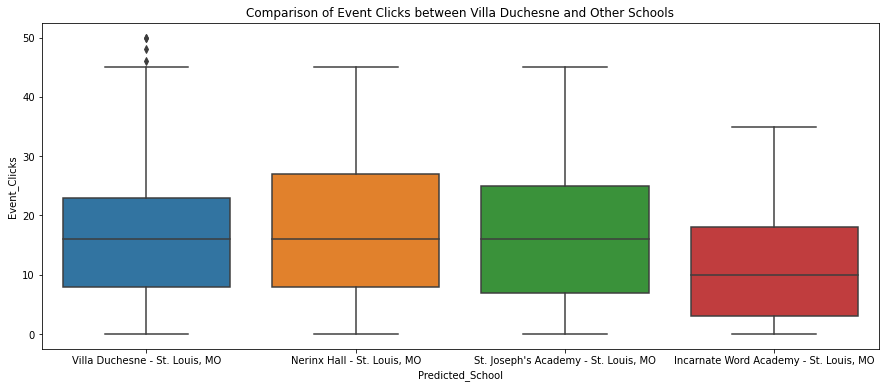

In [27]:
# Predictions for other schools
other_schools_data = selected_features_users[selected_features_users['School'] != 'Villa Duchesne - St. Louis, MO']

# Concatenate the predicted features for Villa Duchesne with the actual features for other schools
comparison_data = pd.concat([villa_duchesne_data_for_prediction, other_schools_data.drop(columns=['User_ID', 'Identification', 'School'])])
comparison_data['Predicted_School'] = np.concatenate((villa_predictions_rf, other_schools_data['School'].values))

# Boxplot comparing Event_Clicks for Villa Duchesne and other schools
plt.figure(figsize=(15, 6))
sns.boxplot(data=comparison_data, x='Predicted_School', y='Event_Clicks')
plt.title('Comparison of Event Clicks between Villa Duchesne and Other Schools')
plt.show()

The Comparison of Event Clicks between Villa Duchesne and the other schools gives us insights into how the generated dummy data looks compared to the other schools. By generating this comparison we can conclude that our dummy data is a properly distributed and is a good representation of the other three schools. This is important to know to ensure that our data is properly created, and will represent the demographics at Villa accurately.  

In [28]:
# Filter numerical columns
numerical_columns = selected_features_users.select_dtypes(include=['int64', 'float64'])
mean_by_school = selected_features_users.groupby('School')[numerical_columns.columns].mean()

# Print the mean for each numerical column
print("Mean values for each numerical column by School:")
mean_by_school

Mean values for each numerical column by School:


,Event_Clicks,Media_Clicks,Directory_Clicks,Days_Logged_In
School,,,,
"Incarnate Word Academy - St. Louis, MO",11.568238,13.379653,4.213400,48.347395
"Nerinx Hall - St. Louis, MO",17.717233,4.015777,7.686893,57.745146
"St. Joseph's Academy - St. Louis, MO",17.107402,4.346880,7.931785,55.802612
"Villa Duchesne - St. Louis, MO",16.070423,6.380282,6.816901,54.192488


This information shows us the average amount of clicks for events, media, directory and shows us the average days logged in. This data shows us that Villa is predicted to be closely related to Nerinx and St. Joseph's. We can take this data to Villa and show them that we predict these results if you take a similar approach as Nerinx and St. Joseph's. To impove upon these results we wil show the most popular events that these other schools put on later in the notebook. 

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model for Events

In [29]:
# Calculating the average number of events among the 3 schools

total_events = [477, 456, 293]
average_events = sum(total_events) / len(total_events)
round(average_events)

409

By calculating the average number of events from all three schools we can help Villa set a baseline for how many events that they should put on inorder to drive the most engagement from their users. 

In [30]:
num_events = 409
villa_events_data = {
    'Name': [f'Event {i}' for i in range(1, num_events + 1)],
    'School': 'Villa Duchesne - St. Louis, MO',
    'Location': np.random.choice(['Location A', 'Location B', 'Location C'], size=num_events),
    'Clicks': np.random.randint(0, 20, size=num_events),
    'Created By': np.random.choice(['User A', 'User B', 'User C'], size=num_events),
    'Category': np.random.choice(['Category 1', 'Category 2', 'Category 3'], size=num_events)
}
selected_features_df2.head()

,Name,School,Location,Clicks,Created By,Category
0,Faculty & Staff Retreat,"Incarnate Word Academy - St. Louis, MO",Pallottine Renewal Center,4,Incarnate Word Academy,Organizational
1,Freshman Volleyball vs. Laffayette High School,"Incarnate Word Academy - St. Louis, MO",Incarnate Word Academy Gym,7,IWA Athletics,Sports
2,Freshman Volleyball vs. Pattonville,"Incarnate Word Academy - St. Louis, MO",Incarnate Word Academy Gym,3,IWA Athletics,Sports
3,IWA Feast Day Holy Week Mass - Liturgy Schedule,"Incarnate Word Academy - St. Louis, MO",2788 Normandy Drive 63121,14,Incarnate Word Academy,Organizational
4,No School - Faculty and Staff Retreat,"Incarnate Word Academy - St. Louis, MO",2788 Normandy Drive 63121,18,Incarnate Word Academy,Organizational


This code generates dummy data for events within the Villa Duchesne school community, including event names, locations, click counts, creators, and categories. Based on these generated events we will see which events genrate the most clicks.

In [31]:
selected_features_df2_filtered = selected_features_df2[['School', 'Clicks']]
selected_features_df2_filtered

,School,Clicks
0,"Incarnate Word Academy - St. Louis, MO",4
1,"Incarnate Word Academy - St. Louis, MO",7
2,"Incarnate Word Academy - St. Louis, MO",3
3,"Incarnate Word Academy - St. Louis, MO",14
4,"Incarnate Word Academy - St. Louis, MO",18
...,...,...
1221,"St. Joseph's Academy - St. Louis, MO",0
1222,"St. Joseph's Academy - St. Louis, MO",0
1223,"St. Joseph's Academy - St. Louis, MO",0
1224,"St. Joseph's Academy - St. Louis, MO",0


In [32]:
# Define the number of rows for the dummy data
num_rows = 409

# Generate dummy data for Villa Duchesne
villa_duchesne_dummy_data = {
    'School': ['Villa Duchesne - St. Louis, MO'] * num_rows,
    'Clicks': np.random.randint(0, 20, size=num_rows)
}

# Create a DataFrame for the dummy data
villa_duchesne_dummy_df = pd.DataFrame(villa_duchesne_dummy_data)
villa_duchesne_dummy_df.head()

,School,Clicks
0,"Villa Duchesne - St. Louis, MO",0
1,"Villa Duchesne - St. Louis, MO",17
2,"Villa Duchesne - St. Louis, MO",19
3,"Villa Duchesne - St. Louis, MO",11
4,"Villa Duchesne - St. Louis, MO",15


In [33]:
# Merging the data for Events:
merged_data_events = pd.concat([selected_features_df2_filtered, villa_duchesne_dummy_df], ignore_index=True)
merged_data_events

,School,Clicks
0,"Incarnate Word Academy - St. Louis, MO",4
1,"Incarnate Word Academy - St. Louis, MO",7
2,"Incarnate Word Academy - St. Louis, MO",3
3,"Incarnate Word Academy - St. Louis, MO",14
4,"Incarnate Word Academy - St. Louis, MO",18
...,...,...
1630,"Villa Duchesne - St. Louis, MO",19
1631,"Villa Duchesne - St. Louis, MO",11
1632,"Villa Duchesne - St. Louis, MO",1
1633,"Villa Duchesne - St. Louis, MO",10


In [34]:
# Here we only take the data for the other three schools (not including Villa Duchesne) and use it for training, we can still evaluate the model's performance on the test set containing Villa Duchesne data. 
# This approach allows us to assess how well the model generalizes to unseen data, including data from a different school.

other_schools_data = merged_data_events[merged_data_events['School'] != 'Villa Duchesne - St. Louis, MO']

# Split data into features (X) and target (y)
X = other_schools_data.drop(columns=['School'])
y = other_schools_data['Clicks']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict the clicks for Villa Duchesne using the trained model
villa_duchesne_data_for_prediction = merged_data_events[merged_data_events['School'] == 'Villa Duchesne - St. Louis, MO'].drop(columns=['School'])
villa_duchesne_clicks_predicted = model.predict(villa_duchesne_data_for_prediction)

In [35]:
# Predictions for the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.7866890585210579


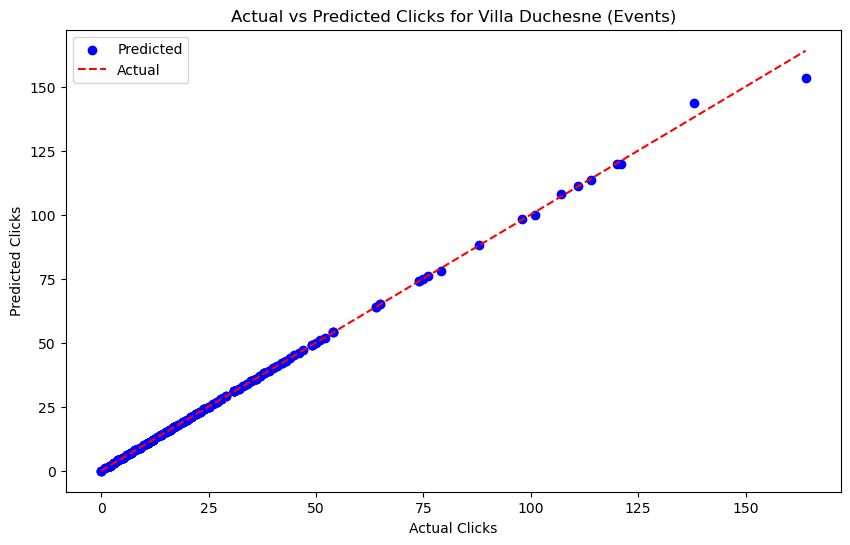

In [14]:
# Plot actual vs predicted clicks
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('Actual vs Predicted Clicks for Villa Duchesne (Events)')
plt.legend()
plt.show()

# The below graph indicates that the model is making nearly perfect predictions. This scenario is ideal and suggests that the model is accurately capturing the underlying patterns in the data. 
# It means that the predicted values are very close to the actual values, which is a sign of a well-performing model.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model for Media

In [37]:
# Calculating the average number of media among the 3 schools

total_media = [225, 81, 57]
average_media = sum(total_media) / len(total_media)
round(average_media)

121

In [38]:
# Set the number of dummy rows for Villa Duchesne
num_rows = 121

# Define the columns and their characteristics
columns = ['School', 'Clicks']

# Generate dummy data for Villa Duchesne
villa_duchesne_media_data = {
    'School': ['Villa Duchesne - St. Louis, MO'] * num_rows,
    'Clicks': np.random.randint(0, 50, size=num_rows)
}

# Create DataFrame for Villa Duchesne media dummy data
villa_duchesne_media = pd.DataFrame(villa_duchesne_media_data, columns=columns)
print("Dummy Data for Villa Duchesne (Media):")
villa_duchesne_media

Dummy Data for Villa Duchesne (Media):


,School,Clicks
0,"Villa Duchesne - St. Louis, MO",2
1,"Villa Duchesne - St. Louis, MO",3
2,"Villa Duchesne - St. Louis, MO",36
3,"Villa Duchesne - St. Louis, MO",39
4,"Villa Duchesne - St. Louis, MO",47
...,...,...
116,"Villa Duchesne - St. Louis, MO",32
117,"Villa Duchesne - St. Louis, MO",15
118,"Villa Duchesne - St. Louis, MO",37
119,"Villa Duchesne - St. Louis, MO",34


In [39]:
selected_features_df3_filtered = selected_features_df3[['School', 'Clicks']]
selected_features_df3_filtered

,School,Clicks
0,"Incarnate Word Academy - St. Louis, MO",44
1,"Incarnate Word Academy - St. Louis, MO",39
2,"Incarnate Word Academy - St. Louis, MO",38
3,"Incarnate Word Academy - St. Louis, MO",38
4,"Incarnate Word Academy - St. Louis, MO",38
...,...,...
358,"St. Joseph's Academy - St. Louis, MO",16
359,"St. Joseph's Academy - St. Louis, MO",15
360,"St. Joseph's Academy - St. Louis, MO",13
361,"St. Joseph's Academy - St. Louis, MO",6


In [40]:
# Merge the dummy data for Villa Duchesne with selected_features_df3_filtered
merged_data_media = pd.concat([selected_features_df3_filtered, villa_duchesne_media], ignore_index=True)
merged_data_media

,School,Clicks
0,"Incarnate Word Academy - St. Louis, MO",44
1,"Incarnate Word Academy - St. Louis, MO",39
2,"Incarnate Word Academy - St. Louis, MO",38
3,"Incarnate Word Academy - St. Louis, MO",38
4,"Incarnate Word Academy - St. Louis, MO",38
...,...,...
479,"Villa Duchesne - St. Louis, MO",32
480,"Villa Duchesne - St. Louis, MO",15
481,"Villa Duchesne - St. Louis, MO",37
482,"Villa Duchesne - St. Louis, MO",34


In [41]:
# Split data into features (X_media) and target (y_media)
X_media = merged_data_media.drop(columns=['School'])
y_media = merged_data_media['Clicks']

# Split data into training and testing sets
X_train_media, X_test_media, y_train_media, y_test_media = train_test_split(X_media, y_media, test_size=0.2, random_state=42)

# Train the model
model_media = RandomForestRegressor()
model_media.fit(X_train_media, y_train_media)

# Predict the clicks for Villa Duchesne media
villa_duchesne_media_for_prediction = merged_data_media[merged_data_media['School'] == 'Villa Duchesne - St. Louis, MO'].drop(columns=['School'])
villa_duchesne_media_clicks_predicted = model_media.predict(villa_duchesne_media_for_prediction)

# Calculate RMSE
y_pred_media = model_media.predict(X_test_media)
rmse_media = mean_squared_error(y_test_media, y_pred_media, squared=False)
print("RMSE for Media prediction:", rmse_media)

RMSE for Media prediction: 0.10175268177017643


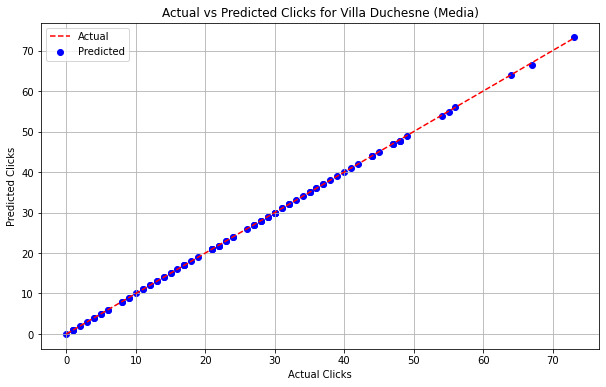

In [42]:
# Plot actual vs predicted clicks
plt.figure(figsize=(10, 6))
plt.scatter(y_test_media, y_pred_media, color='blue', label='Predicted')
plt.plot([0, max(y_test_media)], [0, max(y_test_media)], color='red', linestyle='--', label='Actual')
plt.title('Actual vs Predicted Clicks for Villa Duchesne (Media)')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Totals for events, media, and cost per month
total_events_posts_corrected = 1226 + 409
total_media_posts_corrected = 363 + 121
total_monthly_cost_corrected = 120

total_posts_corrected = total_events_posts_corrected + total_media_posts_corrected
cost_per_post_corrected = total_monthly_cost_corrected / total_posts_corrected

cost_per_post_corrected

0.056630486078338836

To automate the events and media, pulling from multiple sources, it costs around 120 dollars/month for automation tools. Based on the results above, when implementing Villa, it will cost approximately $5.66 cents per post, when I am allocating a monthly budget of 120 dollars across all posts.

In [52]:
# Calculate the reduction in cost per post
cost_per_post_before = 0.0755  # Cost per post before adding Villa's data
cost_per_post_after = 0.0566  # Cost per post after adding Villa's data

reduction_in_cost = cost_per_post_before - cost_per_post_after
reduction_in_cost

0.0189

As a result of Bloc being implemented at Villa, the average cost per post could be reduced by approximately $1.89 cents per post.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model for Directory

In [3]:
# Calculating the average number of directories among the 3 schools

total_directory = [27, 19, 19]
average_directory = sum(total_directory) / len(total_directory)
round(average_directory)

22

Above, we take the average of the number of directories at other schools for later use in our predictive model.

In [11]:
selected_features_df3_filtered = selected_features_df4[['School', 'Clicks']]
selected_features_df3_filtered

,School,Clicks
0,"Incarnate Word Academy - St. Louis, MO",29
1,"Incarnate Word Academy - St. Louis, MO",98
2,"Incarnate Word Academy - St. Louis, MO",36
3,"Incarnate Word Academy - St. Louis, MO",25
4,"Incarnate Word Academy - St. Louis, MO",187
...,...,...
60,"Nerinx Hall - St. Louis, MO",155
61,"Nerinx Hall - St. Louis, MO",291
62,"Nerinx Hall - St. Louis, MO",346
63,"Nerinx Hall - St. Louis, MO",271


In [12]:
# Generate random data for Villa Duchesne
villa_duchesne_data = {
    'School': ['Villa Duchesne - St. Louis, MO'] * 22,
    'Clicks': np.random.randint(20, 100, size=22)
}
villa_duchesne_df = pd.DataFrame(villa_duchesne_data)

# Merge the data with selected_features_df4
merged_data_df4 = pd.concat([selected_features_df3_filtered, villa_duchesne_df], ignore_index=True)

# Display the merged data
print("Merged data with Villa Duchesne:")
merged_data_df4

Merged data with Villa Duchesne:


,School,Clicks
0,"Incarnate Word Academy - St. Louis, MO",29
1,"Incarnate Word Academy - St. Louis, MO",98
2,"Incarnate Word Academy - St. Louis, MO",36
3,"Incarnate Word Academy - St. Louis, MO",25
4,"Incarnate Word Academy - St. Louis, MO",187
...,...,...
82,"Villa Duchesne - St. Louis, MO",93
83,"Villa Duchesne - St. Louis, MO",33
84,"Villa Duchesne - St. Louis, MO",94
85,"Villa Duchesne - St. Louis, MO",83


In [33]:
# Split data into features (X) and target (y)
X = merged_data_df4.drop(columns=['School'])
y = merged_data_df4['Clicks']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict clicks for Villa Duchesne
villa_duchesne_data_for_prediction = merged_data_df4[merged_data_df4['School'] == 'Villa Duchesne - St. Louis, MO'].drop(columns=['School'])
villa_duchesne_clicks_predicted = model.predict(villa_duchesne_data_for_prediction)

# Calculate RMSE
y_pred = model.predict(X_test)

The RMSE of the model above, 0.385, indicates the model can relatively predict the data accurately.

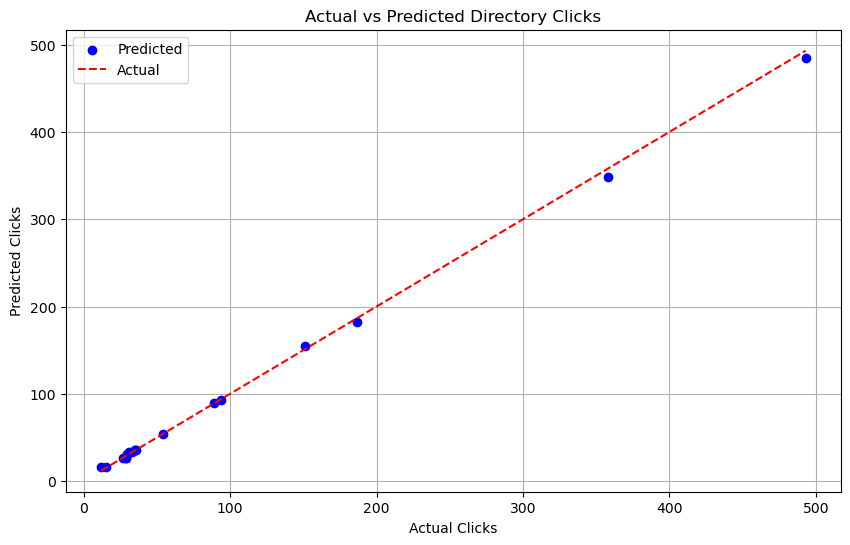

In [14]:
# Plot actual vs predicted clicks
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.title('Actual vs Predicted Directory Clicks')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the actual versus predicted clicks based on our predictive model we trained. The diagonal red line represents where the predicted values would lie if they were perfect predictions, closely matching the actual clicks. The scatter of blue points illustrates how the predictions vary compared to the actual values.

In [38]:
# Create a mapping of school names to user counts
user_counts = {
    'Nerinx Hall - St. Louis, MO': 824,
    'St. Joseph\'s Academy - St. Louis, MO': 689,
    'Incarnate Word Academy - St. Louis, MO': 403
}

# Apply mapping to create a new column for 'Users' based on the 'School' column
df4['Users'] = df4['School'].map(user_counts)

# Create new column for 'Clicks per User'
df4['Clicks per User'] = df4['Clicks'] / df4['Users']

# Sort the DataFrame by 'Clicks per User' first, descending
df4_sorted = df4.sort_values(by='Clicks per User', ascending=False)

# Drop duplicate titles, keeping the first occurrence after sorting (which has the highest clicks per user)
df4_sorted_unique = df4_sorted.drop_duplicates(subset='Title')

# Extract the top 10 titles as recommendations
top_directories = df4_sorted_unique.head(15)['Title'].tolist()
top_directories

['Scholarships',
 'Tuition and Financial Assistance',
 'Curriculum',
 'Athletics',
 'Weekly Newsletter',
 'Service Learning',
 'Give Now',
 'Current Parents',
 'General Information',
 'Counseling',
 'Employment',
 'Academic Guide',
 'Reunions',
 'Contact Coaches',
 'Clubs']

We wanted to analyze the effectiveness of different directories at the 3 schools by considering not just the raw number of clicks each directory receives, but the number of clicks relative to the number of users at each school. This provides a more normalized measure of directory popularity/engagement, as it accounts for the different sizes of the user bases at each school.

The results give us recommendations that can not only benefit the effictiveness of the directory feature in Bloc at Villa, but will also speed up the implementation process greatly.

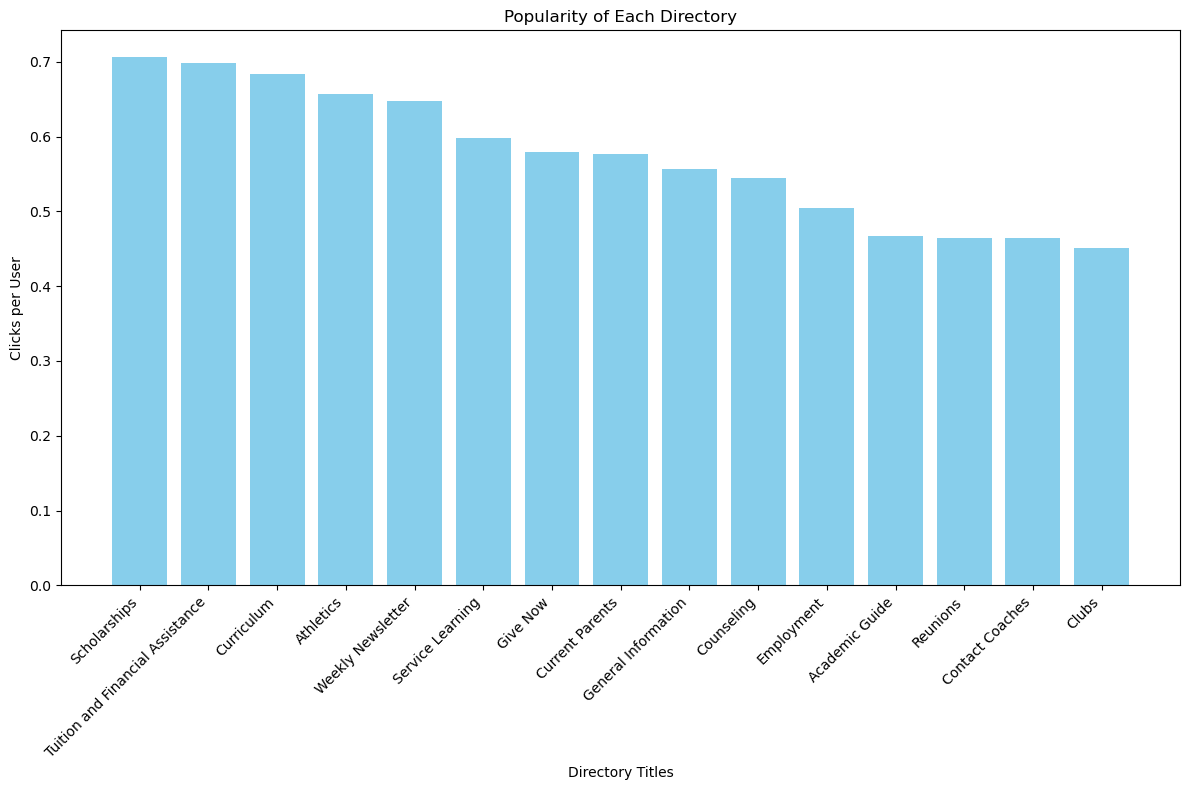

In [41]:
top_directories_df = df4_sorted_unique.head(15)

# Bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_directories_df['Title'], top_directories_df['Clicks per User'], color='skyblue')
plt.xlabel('Directory Titles')
plt.ylabel('Clicks per User')
plt.title('Popularity of Each Directory')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()